In [1]:
import spot
spot.setup(show_default='.a')

In [2]:
f = 'X(((G(p0)) & (X(p1))) | ((F(!(p0))) & (X(!(p1)))) | ((!(p1)) R ((p2) U (p1))))'
!ltlcross -t ltl2tgba -t 'java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std %[WRM]f > %O' -f "{f}"

X(((G(p0)) & (X(p1))) | ((F(!(p0))) & (X(!(p1)))) | ((!(p1)) R ((p2) U (p1))))
Running [P0]: ltl2tgba -H 'X(((G(p0)) & (X(p1))) | ((F(!(p0))) & (X(!(p1)))) | ((!(p1)) R ((p2) U (p1))))'>'lcr-o0-DcW3es'
Running [P1]: java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std 'X(((G(p0)) & (X(p1))) | ((F(!(p0))) & (X(!(p1)))) | (((p2) U (p1)) U (((!(p1)) & ((p2) U (p1))) | (G((p2) U (p1))))))' > 'lcr-o1-RtQLZu'
Running [N0]: ltl2tgba -H '!(X(((G(p0)) & (X(p1))) | ((F(!(p0))) & (X(!(p1)))) | ((!(p1)) R ((p2) U (p1)))))'>'lcr-o0-snfKsy'
Running [N1]: java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std '!(X(((G(p0)) & (X(p1))) | ((F(!(p0))) & (X(!(p1)))) | (((p2) U (p1)) U (((!(p1)) & ((p2) U (p1))) | (G((p2) U (p1)))))))' > 'lcr-o1-oL8EYB'
Performing sanity checks and gathering statistics...
error: Comp(N1)*Comp(P1) is nonempty; both automata accept the infinite word:
       p1; cycle{p0 & !p1 & p2}

error: some error was detected during the above runs,
       please searc

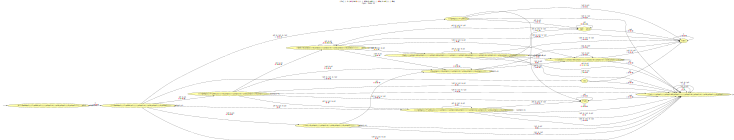

In [3]:
p = spot.automaton('java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std "{}" |'.format(spot.formula(f).unabbreviate('WRM').to_str(parenth=True)))
p

In [4]:
n = spot.automaton('java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std "!({})" |'.format(spot.formula(f).unabbreviate('WRM').to_str(parenth=True)))

We create an automaton for the flawed word and its product with p.

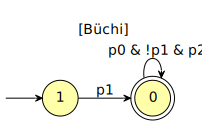

In [5]:
a = spot.translate('p1 & XG(p0 & !p1 & p2)'); a

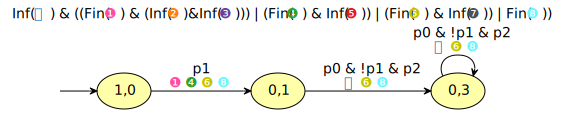

In [6]:
prod = spot.product(a,p); prod

In [7]:
acc = prod.acc()
acc.accepting([0,6,8])

False

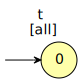

In [8]:
prod.postprocess()

The word is not in $L(p)$ and it is not in $L(f)$ thus the bug is in the negated automaton (or complementation).

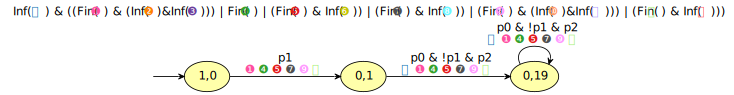

In [9]:
prod_n = spot.product(a,n); prod_n

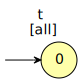

In [10]:
prod_n.postprocess()

Word is not accepted by n, that is incorrect